<a href="https://colab.research.google.com/github/amaljoseph/TensorflowLearnings/blob/master/TFRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [0]:
x_data = np.linspace(0.0, 10, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
"""
y = mx + b

b = 5 
"""

'\ny = mx + b\n\nb = 5 \n'

In [0]:
y_true = (0.5)*x_data + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [0]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [0]:
y_df.head()

,Y
0,5.753143
1,6.336971
2,4.773609
3,5.283195
4,3.874414


In [0]:
my_data = pd.concat([x_df, y_df], axis=1)

In [0]:
my_data.head()

,X Data,Y
0,0.00000,5.753143
1,0.00001,6.336971
2,0.00002,4.773609
3,0.00003,5.283195
4,0.00004,3.874414


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


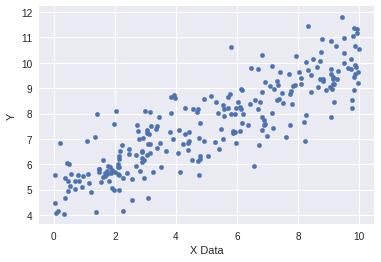

In [0]:
#250 random samples to plot
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [0]:
# to train NN, the huge dataset is split into batches of data
batch_size = 8

In [0]:
#m and b random numbers
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
#my graph to compute
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 1000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    
    sess.run(train, feed_dict=feed)
    
  model_m, model_b = sess.run([m,b])

In [0]:
model_m
model_b

4.926606

In [0]:
y_hat = x_data*model_m + model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


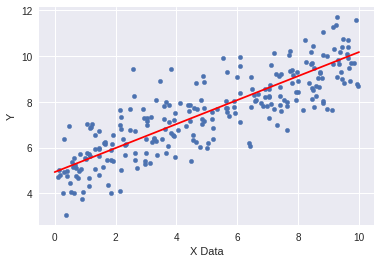

In [0]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')